In [37]:
import matplotlib
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Overview of Cars, Registered in Germany (Jan. 2017/18)

Data taken from the website of [Kraftfahrt Bundesamt](https://www.kba.de/DE/Home/home_node.html), which is the government agency dealing with road traffic, as suborganisation of the Federal ministry of Transport and Digital Infrastructure.

Statistical data of registered vehicles, grouped by brand, model and size, comparing Janurary 2017 to Janurary 2018, was downloaded from [here](https://www.kba.de/DE/Statistik/Fahrzeuge/Bestand/Segmente/segmente_node.html).

In [2]:
# Read the Excel file. Define multi header lines, select desired sheet,
# use the first two columns ['Segment', 'Modellreihe'] as index,
# ignore the last 5 rows as they are general information.
pkw_data_2017_18 = pd.read_excel('fz12_2018_xls.xls', usecols=[1,2,3,4,5,6,7],
                                 header=[7,8], 
                                 sheet_name='Segmente_Bestand_2018',
                                 index_col=[0,1], skipfooter = 5)


In [3]:
pkw_data_2017_18.head()

1. Januar 2018             1. Januar 2017              \
Modellreihe                   Anzahl Anteil in %         Anzahl Anteil in %   
MINIS AUSTIN MINI               8364         0.3           8477         0.3   
      CHEVROLET MATIZ          47673         1.5          52306         1.7   
      CHEVROLET SPARK          34527         1.1          35295         1.1   
      CITROEN C1              102387         3.2          99842         3.2   
      DAIHATSU CUORE           28148         0.9          31570           1   

                      Veränderung gegenüber 1. Januar 2017 in %  
Modellreihe                                  Unnamed: 6_level_1  
MINIS AUSTIN MINI                                          -1.3  
      CHEVROLET MATIZ                                      -8.9  
      CHEVROLET SPARK                                      -2.2  
      CITROEN C1                                            2.5  
      DAIHATSU CUORE                                      -10.8

In [4]:
# How to address/locate a specific cell.
pkw_data_2017_18.loc[('MINIS', 'AUSTIN MINI'), ('1. Januar 2018', 'Anzahl')]

8364

In [5]:
# Get the labels of the first index column as a list.
il = pkw_data_2017_18.index.get_level_values(0).tolist()

# Remove dublicates from the index label list.
index_list = list(dict.fromkeys(il))

# Sort index list into segments and segment totals.
segment = []
segment_totals = []
for i in index_list:
    if 'ZUSAMMEN' in i:
        segment_totals.append(i)
    else:
        segment.append(i)

print('Segment:')
print(segment)
print('')
print('Segment totals:')
print(segment_totals)

Segment:
['MINIS', 'KLEINWAGEN', 'KOMPAKTKLASSE', 'MITTELKLASSE', 'OBERE MITTELKLASSE', 'OBERKLASSE', 'SUVs', 'GELÄNDEWAGEN', 'SPORTWAGEN', 'MINI-VANS', 'GROSSRAUM-VANS', 'UTILITIES', 'WOHNMOBILE', 'SONSTIGE ', 'BESTAND INSGESAMT']

Segment totals:
['MINIS ZUSAMMEN', 'KLEINWAGEN ZUSAMMEN', 'KOMPAKTKLASSE ZUSAMMEN', 'MITTELKLASSE ZUSAMMEN', 'OBERE MITTELKLASSE ZUSAMMEN', 'OBERKLASSE ZUSAMMEN', 'SUVs ZUSAMMEN', 'GELÄNDEWAGEN ZUSAMMEN', 'SPORTWAGEN ZUSAMMEN', 'MINI-VANS ZUSAMMEN', 'GROSSRAUM-VANS ZUSAMMEN', 'UTILITIES ZUSAMMEN', 'WOHNMOBILE ZUSAMMEN']


In [6]:
# Extract number of total registered cars by segment and year.
# 2017
car_segment_total_2017 = []
for i in segment_totals[:]:
    val = pkw_data_2017_18.loc[(i, 'SONSTIGE'), ('1. Januar 2017', 'Anzahl')]
    car_segment_total_2017.append(val)

# 2018
car_segment_total_2018 = []
for i in segment_totals[:]:
    val = pkw_data_2017_18.loc[(i, 'SONSTIGE'), ('1. Januar 2018', 'Anzahl')]
    car_segment_total_2018.append(val)

# Segment by year
car_segment_by_year = []
for i in range(len(car_segment_total_2017)):
    car_segment_by_year.append([car_segment_total_2017[i], 
                                 car_segment_total_2018[i]])

car_segment_by_year

[[3109239, 3196353],
 [8916824, 8935418],
 [12002528, 12057075],
 [6925175, 6726037],
 [2031653, 1996372],
 [275750, 280255],
 [2181473, 2622224],
 [2043255, 2210137],
 [860861, 879685],
 [2030937, 2041370],
 [2093798, 2091088],
 [1702737, 1775444],
 [450167, 486893]]

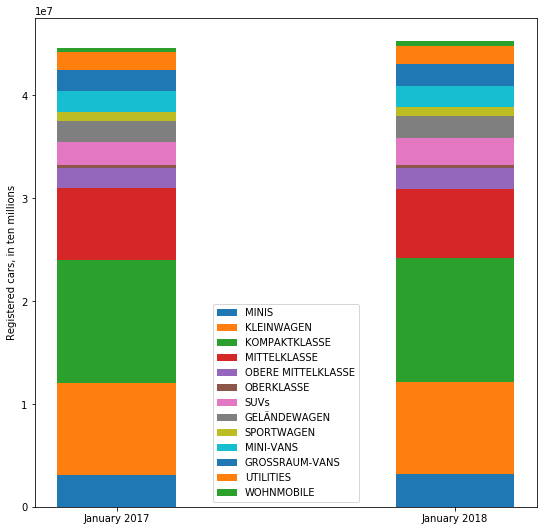

In [7]:
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(9,9))

# Offset values per bar, to stack them correctly.
a = 0
b = 0

for i in range(len(car_segment_by_year[:])):
    plt.bar([0,1], car_segment_by_year[i], width, 
            label=segment[i], bottom=(a, b))
    
    # Add bar size to offset to adjust starting point
    # for the following bar stacked oupon the recent bar.
    a += car_segment_by_year[i][0]
    b += car_segment_by_year[i][1]

plt.legend()  # Upside down compared to bars.
plt.xticks([0,1], ('January 2017', 'January 2018'))
plt.ylabel('Registered cars, in ten millions')

plt.savefig('RegisteredCarsGermany.pdf', dpi=320)

In [60]:
pd.set_option('display.max_rows', 700)
pkw_data_2017_18

1. Januar 2018  \
Modellreihe                                                       Anzahl   
MINIS                       AUSTIN MINI                             8364   
                            CHEVROLET MATIZ                        47673   
                            CHEVROLET SPARK                        34527   
                            CITROEN C1                            102387   
                            DAIHATSU CUORE                         28148   
                            DAIHATSU MOVE                           2104   
                            DAIHATSU TREVIS                         3479   
                            FIAT CINQUECENTO                        5844   
                            FIAT PANDA                            190519   
                            FIAT SEICENTO                          24982   
                            FIAT 500                              230151   
                            FORD KA                               175345   
                            HYUNDAI ATOS                           24517   
                            HYUNDAI I 10                          180271   
                            KIA PICANTO                           117628   
                            LANCIA YPSILON                          9071   
                            MITSUBISHI I-MIEV                       1041   
                            NISSAN PIXO                            12496   
                            OPEL ADAM                             108675   
                            OPEL AGILA                             91710   
                            OPEL KARL                              22777   
                            PEUGEOT ION                             1073   
                            PEUGEOT 106                            32351   
                            PEUGEOT 107                            55183   
                            PEUGEOT 108                            12261   
                            RENAULT TWINGO                        373864   
                            SEAT AROSA                             37147   
                            SEAT MARBELLA                           1396   
                            SEAT MII                               54525   
                            SKODA CITIGO                           77552   
                            SMART FORTWO                          376576   
                            SUZUKI ALTO                            26842   
                            SUZUKI CELERIO                          9759   
                            SUZUKI SPLASH                          29145   
                            SUZUKI WAGON R                         15963   
                            TOYOTA AYGO                           147085   
                            TOYOTA IQ                              15650   
                            VW FOX                                119759   
                            VW LUPO                               152870   
                            VW UP                                 233815   
                            SONSTIGE                                1828   
MINIS ZUSAMMEN              SONSTIGE                             3196353   
KLEINWAGEN                  ALFA ROMEO ALFA MITO                   16019   
                            AUDI A1, S1                           167480   
                            AUDI A2                                54383   
                            BMW I3                                 10833   
                            CHEVROLET AVEO                         22386   
                            CHEVROLET KALOS                         8482   
                            CHEVROLET LANOS                         4282   
                            CITROEN AX                              2291   
                            CITROEN C2                             39582   
                            CI

In [9]:
# How to address/locate a specific cell.
for i in segment:
    pkw_data_2017_18.loc[(i), ('1. Januar 2018', 'Anzahl')].to_frame().sort_values(('1. Januar 2018', 'Anzahl'), ascending=False)

In [48]:
pkw_data_2017_18.loc[('MINIS'), [('1. Januar 2018', 'Anzahl')]].sort_values(('1. Januar 2018', 'Anzahl'), ascending=False)

376576

In [11]:
# pkw_data_2017_18.loc[segment[i]][('1. Januar 2018','Anzahl')]

In [12]:
# data_plot_left = pkw_data_2017_18.loc[(segment[0]), 
#                                       [('1. Januar 2017', 
#                                         'Anzahl')]].sort_values(('1. Januar 2017', 
#                                                                  'Anzahl'), ascending=False)
# data_plot_left[('1. Januar 2017','Anzahl')]

In [13]:
# i=0
# data_plot_left = pkw_data_2017_18.loc[(segment[i]), 
#                                       [('1. Januar 2017', 
#                                         'Anzahl')]].sort_values(('1. Januar 2017', 
#                                                                  'Anzahl'), ascending=False)
# print(data_plot_left.index.tolist())#
# print(data_plot_left[('1. Januar 2017','Anzahl')]/1000)

# x = data_plot_left.index.tolist()
# y = data_plot_left[('1. Januar 2017','Anzahl')].tolist()
# print(x)
# print(y)
# # plt.bar(x, 
# #         y,
# #         width=0.8)
# plt.plot(x,y)

In [42]:
# Round value up to next full value.
def roundup(x, full_value=10):
    return int(math.ceil(x / float(full_value))) * full_value

roundup(340000, 50000)

350000

Text(0.5, 1.0, "Segment:'MINIS', 1. Januar 2018")

<Figure size 432x288 with 0 Axes>

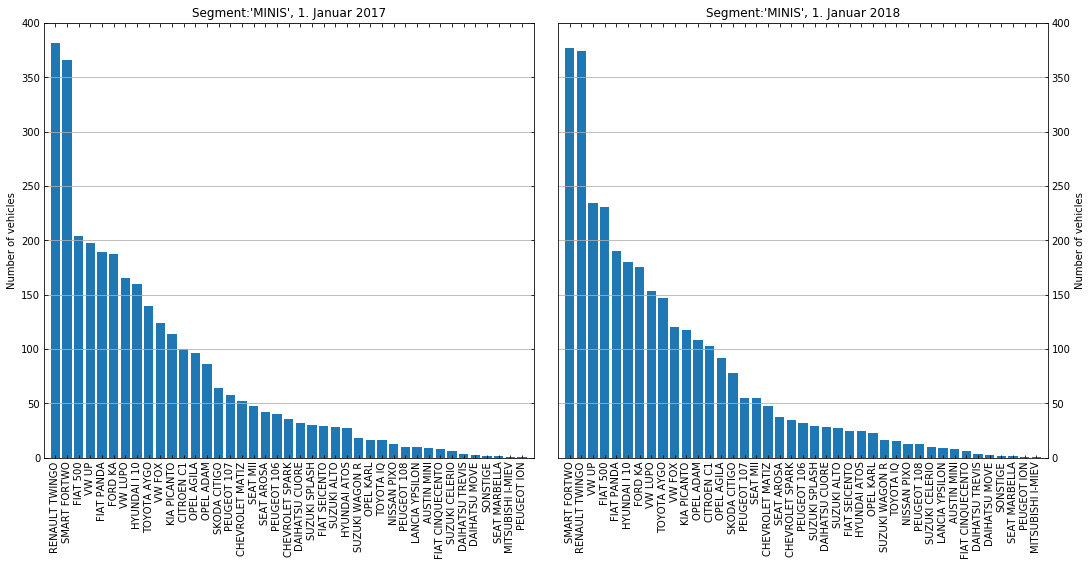

In [56]:
plt.clf()

fig_x = 18
fig_y = 8

i=0

# Begin Plot.
f = plt.figure(figsize=(fig_x, fig_y))#, wspace = 0.2)#gridspec_kw = {'wspace':0, 'hspace':0})

f.tight_layout()
f.subplots_adjust(wspace = 0.05)

# Draw axis ticks on the inside of the plot.
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

# Plot left side.
ax1 = f.add_subplot(1, 2, 1)
# Ticks at all axis.
ax1.tick_params(bottom=True, top=True, 
                left=True, right=True)


num_car_models = len(pkw_data_2017_18.loc[segment[i]].index.tolist())

# Prepare data to plot, sorting the brands by most cars.
data_plot_left = pkw_data_2017_18.loc[(segment[i]), 
                                      [('1. Januar 2017', 
                                        'Anzahl')]].sort_values(('1. Januar 2017', 
                                                                 'Anzahl'), ascending=False)
x_label_left = data_plot_left.index.tolist()

x_data_left = []
for car_model in data_plot_left[('1. Januar 2017','Anzahl')].tolist():
    x_data_left.append(car_model/1000)
    

# Prepare data to plot, sorting the brands by most cars.
data_plot_right = pkw_data_2017_18.loc[(segment[i]), 
                                      [('1. Januar 2018', 
                                        'Anzahl')]].sort_values(('1. Januar 2018', 
                                                                 'Anzahl'), ascending=False)
x_label_right = data_plot_right.index.tolist()

x_data_right = []
for car_model in data_plot_right[('1. Januar 2018','Anzahl')].tolist():
    x_data_right.append(car_model/1000)
    

# Get max values to scale y-axis to the same value in both plots.
max_left = data_plot_left.max()
max_right = data_plot_right.max()

if max_left.iat[0] > max_right.iat[0]:
    new_y_lim = roundup(max_left.iat[0], 50000)
else:
    new_y_lim = roundup(max_right.iat[0], 50000)


ax1.set_xticks(range(num_car_models))
ax1.set_xticklabels(x_label_left,#pkw_data_2017_18.loc[segment[i]].index.tolist(), 
                    rotation='vertical')
# for tick in ax1.get_xticklabels():
#     tick.set_rotation(45)

# data_plot_left = pkw_data_2017_18.loc[(segment[i]), 
#                                       [('1. Januar 2017', 
#                                         'Anzahl')]].sort_values(('1. Januar 2017', 
#                                                                  'Anzahl'), ascending=False)

# ax1.bar(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
#         pkw_data_2017_18.loc[segment[i]][('1. Januar 2017','Anzahl')]/1000, 
#         width=0.8)
ax1.bar(x_label_left, 
        x_data_left,
        #data_plot_left[('1. Januar 2017','Anzahl')].tolist(),
        width=0.8)

ax1.grid(axis='y')
ax1.set_xlim(-1,num_car_models)
ax1.set_ylim(0,new_y_lim/1000)
ax1.set_ylabel('Number of vehicles')

ax1.set_title("Segment:'{}', 1. Januar 2017".format(segment[i]))


# Plot right side.
ax2 = f.add_subplot(1, 2, 2)
# Ticks at all axis.
ax2.tick_params(bottom=True, top=True, 
               left=True, right=True)
ax2.yaxis.tick_right()





num_car_models = len(pkw_data_2017_18.loc[segment[i]].index.tolist())

# Prepare data to plot, sorting the brands by most cars.
data_plot_right = pkw_data_2017_18.loc[(segment[i]), 
                                      [('1. Januar 2018', 
                                        'Anzahl')]].sort_values(('1. Januar 2018', 
                                                                 'Anzahl'), ascending=False)
x_label_right = data_plot_right.index.tolist()

ax2.set_xticks(range(num_car_models))
ax2.set_xticklabels(x_label_right,#pkw_data_2017_18.loc[segment[i]].index.tolist(), 
                    rotation='vertical')

# ax2.set_xticks(range(num_car_models))
# ax2.set_xticklabels(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
#                     rotation='vertical')
# ax2.yaxis.set_label_position("right")

# ax2.bar(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
#         pkw_data_2017_18.loc[segment[i]][('1. Januar 2018','Anzahl')]/1000, 
#         width=0.8)

ax2.bar(x_label_right, 
        x_data_right,
        width=0.8)

ax2.grid(axis='y')
ax2.set_xlim(-1,num_car_models)
ax2.set_ylim(0,new_y_lim/1000)
ax2.set_ylabel('Number of vehicles')
ax2.yaxis.set_label_position('right')

ax2.set_title("Segment:'{}', 1. Januar 2018".format(segment[i]))

TypeError: '<' not supported between instances of 'str' and 'int'

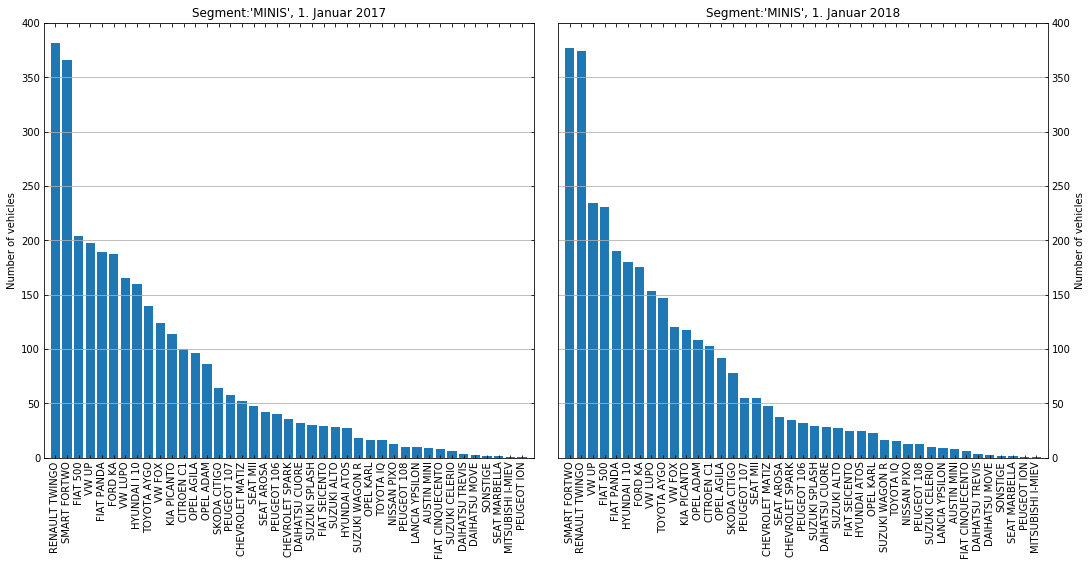

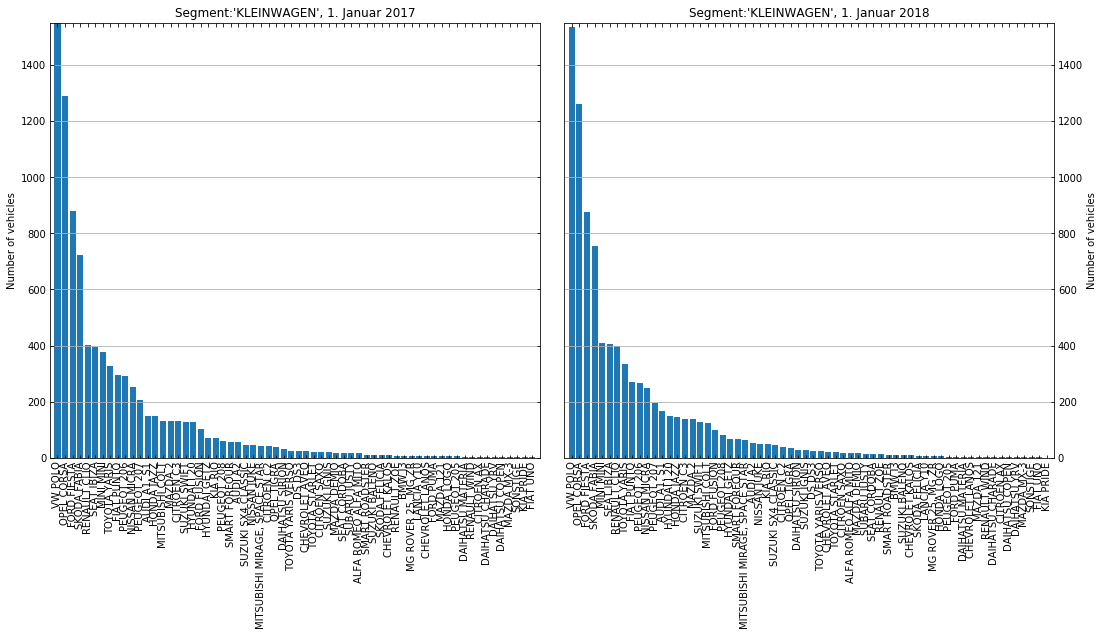

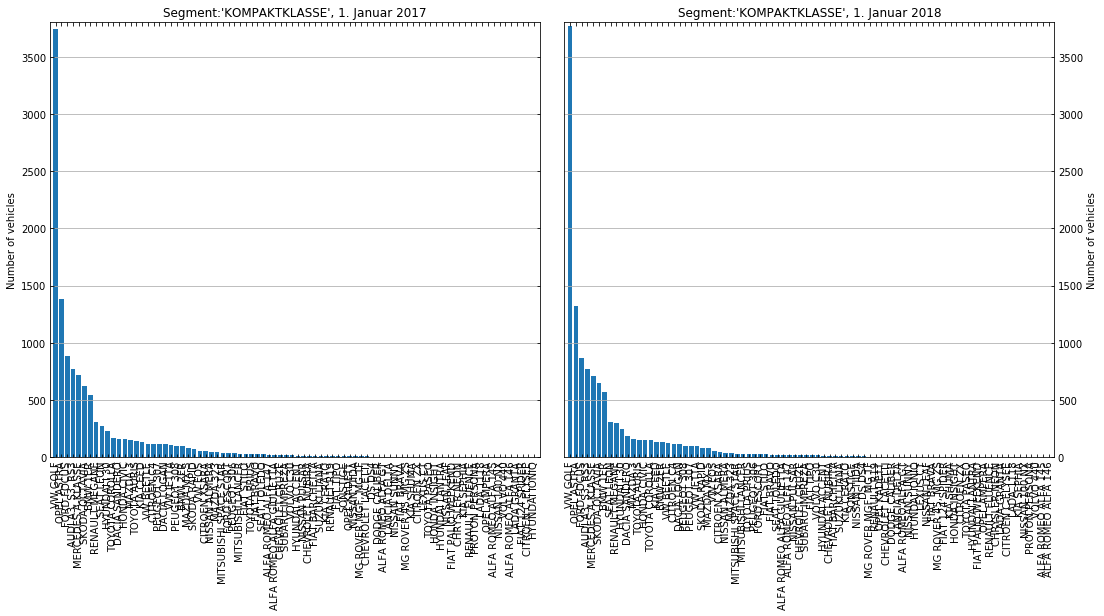

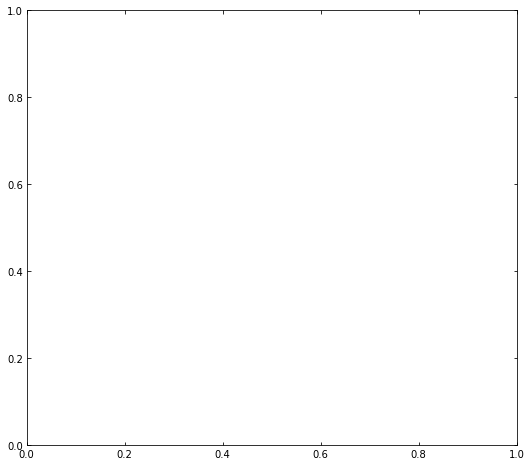

In [58]:
for i in range(len(segment[:])):
#     # Begin Plot.
#     f = plt.figure(figsize=(fig_x, fig_y))#, wspace = 0.2)#gridspec_kw = {'wspace':0, 'hspace':0})

#     f.tight_layout()
#     f.subplots_adjust(wspace = 0.05)

#     # Draw axis ticks on the inside of the plot.
#     matplotlib.rcParams['xtick.direction'] = 'in'
#     matplotlib.rcParams['ytick.direction'] = 'in'

#     # Plot left side.
#     ax1 = f.add_subplot(1, 2, 1)
#     # Ticks at all axis.
#     ax1.tick_params(bottom=True, top=True, 
#                    left=True, right=True)


#     num_car_brands = len(pkw_data_2017_18.loc[segment[i]].index.tolist())

#     ax1.set_xticks(range(num_car_brands))
#     ax1.set_xticklabels(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
#                         rotation='vertical')
#     # for tick in ax1.get_xticklabels():
#     #     tick.set_rotation(45)

#     ax1.bar(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
#             pkw_data_2017_18.loc[segment[i]][('1. Januar 2017','Anzahl')]/1000, 
#             width=0.8)
#     ax1.grid(axis='y')
#     ax1.set_xlim(-1,num_car_brands)
#     ax1.set_ylim(0,400)

#     ax1.set_title("Segment:'{}', 1. Januar 2017".format(segment[i]))


#     # Plot right side.
#     ax2 = f.add_subplot(1, 2, 2)
#     # Ticks at all axis.
#     ax2.tick_params(bottom=True, top=True, 
#                    left=True, right=True)
#     ax2.yaxis.tick_right()




#     num_car_brands = len(pkw_data_2017_18.loc[segment[i]].index.tolist())

#     ax2.set_xticks(range(num_car_brands))
#     ax2.set_xticklabels(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
#                         rotation='vertical')
#     # ax2.yaxis.set_label_position("right")

#     ax2.bar(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
#             pkw_data_2017_18.loc[segment[i]][('1. Januar 2018','Anzahl')]/1000, 
#             width=0.8)

#     ax2.grid(axis='y')
#     ax2.set_xlim(-1,num_car_brands)
#     ax2.set_ylim(0,400)

#     ax2.set_title("Segment:'{}', 1. Januar 2018".format(segment[i]))



    # Begin Plot.
    f = plt.figure(figsize=(fig_x, fig_y))#, wspace = 0.2)#gridspec_kw = {'wspace':0, 'hspace':0})

    f.tight_layout()
    f.subplots_adjust(wspace = 0.05)

    # Draw axis ticks on the inside of the plot.
    matplotlib.rcParams['xtick.direction'] = 'in'
    matplotlib.rcParams['ytick.direction'] = 'in'

    # Plot left side.
    ax1 = f.add_subplot(1, 2, 1)
    # Ticks at all axis.
    ax1.tick_params(bottom=True, top=True, 
                    left=True, right=True)


    num_car_models = len(pkw_data_2017_18.loc[segment[i]].index.tolist())

    # Prepare data to plot, sorting the brands by most cars.
    data_plot_left = pkw_data_2017_18.loc[(segment[i]), 
                                          [('1. Januar 2017', 
                                            'Anzahl')]].sort_values(('1. Januar 2017', 
                                                                     'Anzahl'), ascending=False)
    x_label_left = data_plot_left.index.tolist()

    x_data_left = []
    for car_model in data_plot_left[('1. Januar 2017','Anzahl')].tolist():
        x_data_left.append(car_model/1000)


    # Prepare data to plot, sorting the brands by most cars.
    data_plot_right = pkw_data_2017_18.loc[(segment[i]), 
                                          [('1. Januar 2018', 
                                            'Anzahl')]].sort_values(('1. Januar 2018', 
                                                                     'Anzahl'), ascending=False)
    x_label_right = data_plot_right.index.tolist()

    x_data_right = []
    for car_model in data_plot_right[('1. Januar 2018','Anzahl')].tolist():
        x_data_right.append(car_model/1000)


    # Get max values to scale y-axis to the same value in both plots.
    max_left = data_plot_left.max()
    max_right = data_plot_right.max()

    if max_left.iat[0] > max_right.iat[0]:
        new_y_lim = roundup(max_left.iat[0], 50000)
    else:
        new_y_lim = roundup(max_right.iat[0], 50000)


    ax1.set_xticks(range(num_car_models))
    ax1.set_xticklabels(x_label_left,#pkw_data_2017_18.loc[segment[i]].index.tolist(), 
                        rotation='vertical')
    # for tick in ax1.get_xticklabels():
    #     tick.set_rotation(45)

    # data_plot_left = pkw_data_2017_18.loc[(segment[i]), 
    #                                       [('1. Januar 2017', 
    #                                         'Anzahl')]].sort_values(('1. Januar 2017', 
    #                                                                  'Anzahl'), ascending=False)

    # ax1.bar(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
    #         pkw_data_2017_18.loc[segment[i]][('1. Januar 2017','Anzahl')]/1000, 
    #         width=0.8)
    ax1.bar(x_label_left, 
            x_data_left,
            #data_plot_left[('1. Januar 2017','Anzahl')].tolist(),
            width=0.8)

    ax1.grid(axis='y')
    ax1.set_xlim(-1,num_car_models)
    ax1.set_ylim(0,new_y_lim/1000)
    ax1.set_ylabel('Number of vehicles')

    ax1.set_title("Segment:'{}', 1. Januar 2017".format(segment[i]))


    # Plot right side.
    ax2 = f.add_subplot(1, 2, 2)
    # Ticks at all axis.
    ax2.tick_params(bottom=True, top=True, 
                   left=True, right=True)
    ax2.yaxis.tick_right()





    num_car_models = len(pkw_data_2017_18.loc[segment[i]].index.tolist())

    # Prepare data to plot, sorting the brands by most cars.
    data_plot_right = pkw_data_2017_18.loc[(segment[i]), 
                                          [('1. Januar 2018', 
                                            'Anzahl')]].sort_values(('1. Januar 2018', 
                                                                     'Anzahl'), ascending=False)
    x_label_right = data_plot_right.index.tolist()

    ax2.set_xticks(range(num_car_models))
    ax2.set_xticklabels(x_label_right,#pkw_data_2017_18.loc[segment[i]].index.tolist(), 
                        rotation='vertical')

    # ax2.set_xticks(range(num_car_models))
    # ax2.set_xticklabels(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
    #                     rotation='vertical')
    # ax2.yaxis.set_label_position("right")

    # ax2.bar(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
    #         pkw_data_2017_18.loc[segment[i]][('1. Januar 2018','Anzahl')]/1000, 
    #         width=0.8)

    ax2.bar(x_label_right, 
            x_data_right,
            width=0.8)

    ax2.grid(axis='y')
    ax2.set_xlim(-1,num_car_models)
    ax2.set_ylim(0,new_y_lim/1000)
    ax2.set_ylabel('Number of vehicles')
    ax2.yaxis.set_label_position('right')

    ax2.set_title("Segment:'{}', 1. Januar 2018".format(segment[i]))

In [16]:
index_dict = {}
for i in segment:
    index_dict[i] = pkw_data_2017_18.loc[(i)].index.tolist()

In [17]:
index_dict

{'MINIS': ['AUSTIN MINI',
  'CHEVROLET MATIZ',
  'CHEVROLET SPARK',
  'CITROEN C1',
  'DAIHATSU CUORE',
  'DAIHATSU MOVE',
  'DAIHATSU TREVIS',
  'FIAT CINQUECENTO',
  'FIAT PANDA',
  'FIAT SEICENTO',
  'FIAT 500',
  'FORD KA',
  'HYUNDAI ATOS',
  'HYUNDAI I 10',
  'KIA PICANTO',
  'LANCIA YPSILON',
  'MITSUBISHI I-MIEV',
  'NISSAN PIXO',
  'OPEL ADAM',
  'OPEL AGILA',
  'OPEL KARL',
  'PEUGEOT ION',
  'PEUGEOT 106',
  'PEUGEOT 107',
  'PEUGEOT 108',
  'RENAULT TWINGO',
  'SEAT AROSA',
  'SEAT MARBELLA',
  'SEAT MII',
  'SKODA CITIGO',
  'SMART FORTWO',
  'SUZUKI ALTO',
  'SUZUKI CELERIO',
  'SUZUKI SPLASH',
  'SUZUKI WAGON R',
  'TOYOTA AYGO',
  'TOYOTA IQ',
  'VW FOX',
  'VW LUPO',
  'VW UP',
  'SONSTIGE'],
 'KLEINWAGEN': ['ALFA ROMEO ALFA MITO',
  'AUDI A1, S1',
  'AUDI A2',
  'BMW I3',
  'CHEVROLET AVEO',
  'CHEVROLET KALOS',
  'CHEVROLET LANOS',
  'CITROEN AX',
  'CITROEN C2',
  'CITROEN C3',
  'CITROEN SAXO',
  'DAIHATSU CHARADE',
  'DAIHATSU COPEN',
  'DAIHATSU MATERIA',
  'DAIH

In [18]:
index_dict[segment[0]]

['AUSTIN MINI',
 'CHEVROLET MATIZ',
 'CHEVROLET SPARK',
 'CITROEN C1',
 'DAIHATSU CUORE',
 'DAIHATSU MOVE',
 'DAIHATSU TREVIS',
 'FIAT CINQUECENTO',
 'FIAT PANDA',
 'FIAT SEICENTO',
 'FIAT 500',
 'FORD KA',
 'HYUNDAI ATOS',
 'HYUNDAI I 10',
 'KIA PICANTO',
 'LANCIA YPSILON',
 'MITSUBISHI I-MIEV',
 'NISSAN PIXO',
 'OPEL ADAM',
 'OPEL AGILA',
 'OPEL KARL',
 'PEUGEOT ION',
 'PEUGEOT 106',
 'PEUGEOT 107',
 'PEUGEOT 108',
 'RENAULT TWINGO',
 'SEAT AROSA',
 'SEAT MARBELLA',
 'SEAT MII',
 'SKODA CITIGO',
 'SMART FORTWO',
 'SUZUKI ALTO',
 'SUZUKI CELERIO',
 'SUZUKI SPLASH',
 'SUZUKI WAGON R',
 'TOYOTA AYGO',
 'TOYOTA IQ',
 'VW FOX',
 'VW LUPO',
 'VW UP',
 'SONSTIGE']

In [19]:
data_set=sim_result_dfs 
title='C219_13e, MT3, Workstation Simulations'
x_label='Time /s'
y_label='Energy Release Rate /kW'
# exp_df=None, 
model_df=mt3_exp_data 
x_min=0 
x_max=3000 
y_min=0 
y_max=250 
# new_file_name=None 
fig_x=18 
fig_y=8

data_x_label='Time'
data_y_label='HRR'
mod_x_label='Time'
mod_y_label='HRR'

with_lines = [2,7]


# x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

# y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)


# f = plt.figure()
# ax = f.add_subplot(111)
# ax.yaxis.tick_right()


# Draw axis ticks on the inside of the plot.
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

num_plots = len(data_set)
    
f = plt.figure(figsize=(fig_x, fig_y))#, wspace = 0.2)#gridspec_kw = {'wspace':0, 'hspace':0})

f.tight_layout()
f.subplots_adjust(wspace = 0.075)

# Plot left side.
ax1 = f.add_subplot(1, 2, 1)
# Ticks at all axis.
ax1.tick_params(bottom=True, top=True, 
               left=True, right=True)

# # Plot experimental data.
# if exp_df is not None:
#     plt.plot(exp_df.Time, 
#              exp_df.HRR, color='b', 
#              marker='.', linestyle='None')
# Plot model data, related to above experiment.
if model_df is not None:
    ax1.plot(model_df[mod_x_label], 
             model_df[mod_y_label], color='k')

plt.gca().set_prop_cycle(plt.cycler('color', 
                                    plt.cm.viridis(np.linspace(0, 1, 
                                                               num_plots))))

for data_series in sim_result_dfs[:]:
#     print('Sim')
    ax1.plot(data_series[data_x_label],
            data_series[data_y_label])

ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)

plt.title(title)
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)

# Grid as background.
ax1.grid('on', linestyle=':')

# Plot right side.
ax2 = f.add_subplot(1, 2, 2)
ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# Ticks at all axis.
ax2.tick_params(bottom=True, top=True,
                left=True, right=True, 
                labelleft=False, labelright=True)
ax2.yaxis.set_label_position("right")

# Plot vertical lines for orientation.
for i in range(36):
    ax2. plot([i+1,i+1], [-0.1,1.1], color='lightgrey')


plt.gca().set_prop_cycle(plt.cycler('color', 
                                    plt.cm.viridis(np.linspace(0, 1, 
                                                               num_plots))))
for i, para_set in enumerate(normalised_para_set[:num_plots]):
#     print('Para')
    for j in with_lines:
        if i == j:
            ax2.plot(para_set[0], para_set[1], 
                     linestyle='-', marker='o')
        else:
            ax2.plot(para_set[0], para_set[1], 
                     linestyle='', marker='.')


ax2.set_xlim(0, 37)
ax2.set_ylim(0, 1)

ax2.set_xlabel('Parameters')
ax2.set_ylabel('Normalised Sampling Range')

# Grid as background.
# ax2.grid('off', linestyle=':')

# plt.savefig('Cars_DoubleTest{}.png'.format(imp_label), 
#             dpi=350)

NameError: name 'sim_result_dfs' is not defined